In [1]:
'''data_of_noda = {}
index = 0

def find_bondes(corners):
    for i in range(1, len(corners)):
        

for i in range(1, len(corners)):
    data_of_noda[index] ='''

'data_of_noda = {}\nindex = 0\n\ndef find_bondes(corners):\n    for i in range(1, len(corners)):\n        \n\nfor i in range(1, len(corners)):\n    data_of_noda[index] ='

In [2]:
'''import cv2
import numpy as np

image = cv2.imread('3.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)

minLineLength = 500
maxLineGap = 70
lines = cv2.HoughLinesP(close,1,np.pi/180,80,30,0)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(image,(x1,y1),(x2,y2),(36,255,12),3)

cv2.imwrite('houghlines5.jpg', image)'''

"import cv2\nimport numpy as np\n\nimage = cv2.imread('3.jpg')\ngray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\nthresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]\n\nkernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))\nclose = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)\n\nminLineLength = 500\nmaxLineGap = 70\nlines = cv2.HoughLinesP(close,1,np.pi/180,80,30,0)\nfor line in lines:\n    for x1,y1,x2,y2 in line:\n        cv2.line(image,(x1,y1),(x2,y2),(36,255,12),3)\n\ncv2.imwrite('houghlines5.jpg', image)"

<a href="https://colab.research.google.com/github/Anthonyvol/abstract_dog/blob/issue-1/Copy_of_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#from google.colab.patches import cv2_imshow

In [41]:
'''
It cleans img from noise
'''
def clear_img(file_name):
    img = cv2.imread(file_name, 0)

    dilated_img = cv2.dilate(img, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(img, bg_img)
    norm_img = diff_img.copy()
    cv2.normalize(diff_img, norm_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    _, thr_img = cv2.threshold(norm_img, 230, 0, cv2.THRESH_TRUNC)
    cv2.normalize(thr_img, thr_img, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    thr_img[thr_img < 240] = 0
    cv2.imwrite("c_" + file_name, thr_img)

'''
It resizes image
'''
def resize_img(img, scale):
    return cv2.resize(img,(img.shape[1] * scale, img.shape[0] * scale))

'''
Finding edges 
'''
def define_edged(img, min, max):
    return cv2.Canny(img, min, max)

'''
Finding contours
'''
def get_contours(edged):
    return cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]

In [5]:
clear_img("3.jpg")

img = cv2.imread('c_3.jpg')

cv2.imshow(img), plt.show()
cv2.imsave('big.jpg', resize_img(img, 3))

TypeError: imshow() missing required argument 'mat' (pos 2)

In [17]:
image = cv2.imread('3.jpg')

edged = define_edged(image, 30, 200)
contours, hierarchy = get_contours(edged)

image[::] = 255
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

plt.imshow(image)
plt.show()

NameError: name 'define_edged' is not defined

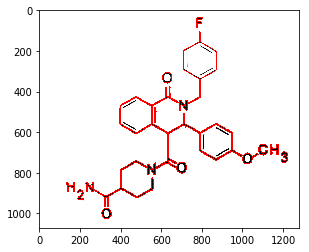

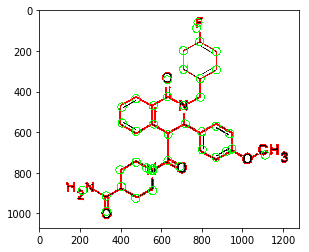

In [53]:
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from math import sqrt

image = cv2.imread('3.jpg')

edged = define_edged(image, 30, 200)
contours, hierarchy = get_contours(edged)

#image[::] = 255
cv2.drawContours(image, contours, -1, (255, 0, 0), 3) 

plt.imshow(image)
plt.show()

cv2.imwrite('test.jpg', img)


img = cv2.imread('3.jpg')
img = image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 30, 3, 0.04)
ret, dst = cv2.threshold(dst, 0.1*dst.max(), 255, 0)
dst = np.uint8(dst)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray, np.float32(centroids), (10,10), (-1,-1), criteria)


#for i in range(1, len(corners)):
    #print(corners[i])
#img[dst>0.1*dst.max()]=[0,0,255]

for i in range(1, len(corners)):
    #print(corners[1])
    #distanse = sqrt((corners[i, 0] - corners[i-1, 0])**2 + (corners[i, 1] - corners[i-1, 1])**2)
    #if distanse > 70.0:
    cv2.circle(img, (int(corners[i, 0]), int(corners[i, 1])), 20, (0,255,0), 3)

dx = np.abs((corners[4][0] - corners[7][0]) / 10)
dy = np.abs((corners[4][1] - corners[7][1]) / 10)
signx = 1
signy = 1
if corners[4][0] > corners[7][0]:
    signx = -1
if corners[4][1] > corners[7][1]:
    signy = -1
'''for i in range(9):
    print(img[int(corners[3][0] + dx * i * signx)][int(corners[3][1] + dy * signy * i)])
    cv2.line(img, (int(corners[3][0] + dx * i * signx), int(corners[3][1] + dy * signy * i)), 20, (0,255,0), 3)'''
cv2.line(img, (int(corners[4][0] + dx * 0 * signx), int(corners[4][1] + dy * signy * 1)), (int(corners[4][0] + dx * 8 * signx), int(corners[4][1] + dy * signy * 8)), (0,255,0),2)
#cv2.circle()
#cv2.circle(img, (int(corners[18, 0]), int(corners[18, 1])), 20, (0,255,0), 3)
#cv2.circle(img, (int(corners[35, 0]), int(corners[35, 1])), 20, (0,255,0), 3)
plt.imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows

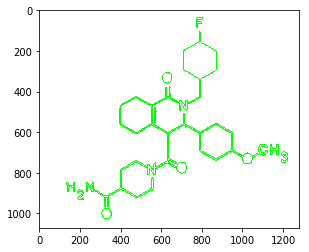

In [42]:
image = cv2.imread('3.jpg')

edged = define_edged(image, 30, 200)
contours, hierarchy = get_contours(edged)

image[::] = 255
cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 

plt.imshow(image)
plt.show()

{0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {15: 1}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}, 31: {}, 32: {}, 33: {}, 34: {}, 35: {}, 36: {}, 37: {}, 38: {}, 39: {}, 40: {}, 41: {42: 1}, 42: {}, 43: {44: 1}, 44: {}, 45: {}, 46: {}}


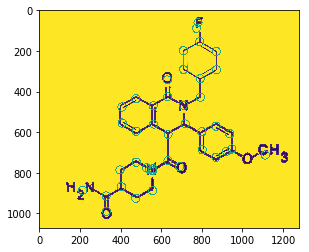

In [57]:
img = cv2.imread('test.jpg', 0)
res = {}
flag = 0
deltax = 0
deltay = 0
signx = 1
signy = 1
i = 0
j = 0

for c in corners:
    if c[0] > img.shape[0] or c[1] > img.shape[1]:
        continue
    j = i + 1
    res[i] = dict()
    signx = 1
    signy = 1
    for c2 in corners[i + 1:]:
        if c2[0] > img.shape[0] or c2[1] > img.shape[1]:
            continue
        deltax = np.abs((c[0] - c2[0]) / 10)
        deltay = np.abs((c[1] - c2[1]) / 10)
        if (c[0] > c2[0]):
            signx = -1
        if (c[1] > c2[1]):
            signy = -1
        flag = 0
        for k in range(1, 7):
            if i == 1 and j == 1:
                cv2.circle(img, (int(c[0] + k * deltax * signx), int(c[1] + k * deltay * signy)), 20, (0,0,255), 3)
            if img[int(c[0] + k * deltax * signx)][int(c[1] + k * deltay * signy)] != 255:
                flag = 1
            else:
                flag = 0
                break
        if flag == 1:
            res[i][j] = 1
        j += 1
    i += 1
        
print(res)
plt.imshow(img)
